In [1]:
import pandas as pd   #importing pandas
import numpy as np    #importing numpy
import matplotlib.pyplot as plt   #importing matplotlib
import seaborn as sns   #importing seaborn


In [2]:
dataset = pd.read_csv('economy.csv')   #reading the data from the csv file  
dataset.head()   #displaying the first 5 rows of the dataset
dataset.dtypes   #displaying the data types of the columns in the dataset
dataset.describe()   #displaying the summary statistics of the dataset
dataset.isnull().sum()   #checking for missing values in the dataset
dataset.duplicated().sum()   #checking for duplicated values in the dataset
dataset.drop_duplicates(inplace=True)   #dropping the duplicated values in the dataset
dataset.shape   #displaying the shape of the dataset
dataset.columns   #displaying the columns in the dataset
dataset.dtypes 

date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
dtype: object

In [3]:
dataset.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [4]:
dataset["date"] = pd.to_datetime(dataset["date"], format="%d-%m-%Y")   #converting the date column to datetime


In [5]:
dataset["year"] = dataset["date"].dt.year   #extracting the year from the date column
dataset["month"] = dataset["date"].dt.month   #extracting the month from the date column
dataset["day"] = dataset["date"].dt.day   #extracting the day from the date column


In [6]:
dataset["dep_time"] = pd.to_datetime(dataset["dep_time"], format="%H:%M")   #converting the dep_time column to datetime
dataset["arr_time"] = pd.to_datetime(dataset["arr_time"], format="%H:%M")   #converting the arr_time column to datetime
dataset["price"] = dataset["price"].str.replace("$", "").str.replace(",", "").astype(float)   #removing the dollar sign and commas from the price column and converting it to float

In [7]:
dataset.reset_index(drop=True, inplace=True)   #resetting the index of the dataset
dataset = dataset.applymap(lambda x: x.strip() if type(x)==str else x)   #stripping the leading and trailing whitespaces in the dataset

C:\Users\lucas\AppData\Local\Temp\ipykernel_11640\369971713.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset = dataset.applymap(lambda x: x.strip() if type(x)==str else x)   #stripping the leading and trailing whitespaces in the dataset


In [9]:
dataset["flight_time"] = dataset["arr_time"] - dataset["dep_time"]   #calculating the flight time by subtracting the departure time from the arrival time
dataset["flight_time"] = dataset["flight_time"].dt.seconds/60   #converting the flight time to minutes
dataset["flight_time"] = dataset["flight_time"].astype(int)   #converting the flight time to integer

In [10]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
dataset_cleaned = dataset[~(dataset['price'] < lower_bound) | (dataset['price'] > upper_bound)]

print(dataset_cleaned)

             date   airline ch_code  num_code            dep_time     from  \
0      2022-02-11  SpiceJet      SG      8709 1900-01-01 18:55:00    Delhi   
1      2022-02-11  SpiceJet      SG      8157 1900-01-01 06:20:00    Delhi   
2      2022-02-11   AirAsia      I5       764 1900-01-01 04:25:00    Delhi   
3      2022-02-11   Vistara      UK       995 1900-01-01 10:20:00    Delhi   
4      2022-02-11   Vistara      UK       963 1900-01-01 08:50:00    Delhi   
...           ...       ...     ...       ...                 ...      ...   
206767 2022-03-31   Vistara      UK       832 1900-01-01 07:05:00  Chennai   
206768 2022-03-31   Vistara      UK       832 1900-01-01 07:05:00  Chennai   
206769 2022-03-31   Vistara      UK       826 1900-01-01 12:30:00  Chennai   
206770 2022-03-31   Vistara      UK       822 1900-01-01 09:45:00  Chennai   
206771 2022-03-31   Vistara      UK       824 1900-01-01 20:30:00  Chennai   

       time_taken      stop            arr_time         to   pr

In [11]:
dataset.dtypes

date           datetime64[ns]
airline                object
ch_code                object
num_code                int64
dep_time       datetime64[ns]
from                   object
time_taken             object
stop                   object
arr_time       datetime64[ns]
to                     object
price                 float64
year                    int64
month                   int64
day                     int64
flight_time             int32
dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
for column in dataset.columns:
    if dataset[column].dtype == np.number or dataset[column].dtype == "datetime64[ns]":
        continue
    dataset[column] = LabelEncoder().fit_transform(dataset[column])

C:\Users\lucas\AppData\Local\Temp\ipykernel_11640\955880069.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dataset[column].dtype == np.number or dataset[column].dtype == "datetime64[ns]":
C:\Users\lucas\AppData\Local\Temp\ipykernel_11640\955880069.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dataset[column].dtype == np.number or dataset[column].dtype == "datetime64[ns]":
C:\Users\lucas\AppData\Local\Temp\ipykernel_11640\955880069.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dataset[column].dtype == np.number or dataset[column].dtype == "datetime64[ns]":
C:\Users\lucas\AppData\Local\Temp\ipykernel_11640\955880069.py:3: DeprecationWarning: Converti

In [13]:
dataset.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,year,month,day,flight_time
0,2022-02-11,4,6,1198,1900-01-01 18:55:00,2,16,36,1900-01-01 21:05:00,5,5953.0,0,0,10,26
1,2022-02-11,4,6,1177,1900-01-01 06:20:00,2,18,36,1900-01-01 08:40:00,5,5953.0,0,0,10,28
2,2022-02-11,1,4,423,1900-01-01 04:25:00,2,16,36,1900-01-01 06:35:00,5,5956.0,0,0,10,26
3,2022-02-11,7,7,605,1900-01-01 10:20:00,2,17,36,1900-01-01 12:35:00,5,5955.0,0,0,10,27
4,2022-02-11,7,7,583,1900-01-01 08:50:00,2,18,36,1900-01-01 11:10:00,5,5955.0,0,0,10,28


In [14]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = dataset.drop(columns=['price', 'date', 'dep_time', 'arr_time'])
y = dataset['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (165417, 11)
Testing set size: (41355, 11)


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error



In [ ]:
a={'Model Name':[], "Mean Absolute Error (MAE)":[], "Root Mean Squared Error (RMSE)":[], "R-squared":[], "Adjusted R-squared":[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean Absolute Error (MAE),Root Mean Squared Error (RMSE),R-squared,Adjusted R-squared


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor


models = [
    ('linear_regression', LinearRegression()),
    ('ridge', Ridge()),
    ("lasso", Lasso()),
    ("decision_tree", DecisionTreeRegressor()),
    ("random_forest", RandomForestRegressor()),
    ("ada_boost", AdaBoostRegressor()),
    #("SVR", SVR()),
    ('knn', KNeighborsRegressor(n_neighbors=5)),
    ("extra_trees", ExtraTreesRegressor()),
    ("bagging", BaggingRegressor()),
    ("xgb", xgb.XGBRegressor()),
    ("lgbm", lgb.LGBMRegressor()),
    ("catboost", CatBoostRegressor()),
    ("hist_gradient_boosting", HistGradientBoostingRegressor()),
    ("stacking", StackingRegressor(estimators=[('lr', LinearRegression()), ('rf', RandomForestRegressor())])),
    ("voting", VotingRegressor(estimators=[('lr', LinearRegression()), ('rf', RandomForestRegressor())])),
    ("lasso_alpha_0.1", Lasso(alpha=0.1)),
    ("gradient_boosting", GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0))
]

for name, model in models:
    model.fit(X_train, y_train)
    predict_rf = model.predict(X_test)
    print("------------------------------------------------------------------------------------------------------------")
    print("model:", model)
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predict_rf))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, predict_rf))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, predict_rf)))
    print("R-squared:", r2_score(y_test, predict_rf))
    print("Adjusted R-squared:", 1 - (1 - r2_score(y_test, predict_rf)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
    print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((y_test - predict_rf) / y_test)) * 100)
   
    print("Actual Values:", y_test)
    print("Predicted Values:", predict_rf)  


    new_row = {'Model Name' : name,
            'Mean Absolute Error (MAE)' : mean_absolute_error(y_test, predict_rf),
            "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, predict_rf)),
            "R-squared": r2_score(y_test, predict_rf),
            'Adjusted R-squared' : 1 - (1 - r2_score(y_test, predict_rf)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1),
            }
    new_row = pd.DataFrame(new_row, index=[0])
    Results = pd.concat([Results, new_row], axis=0)



In [44]:
Results

,Model Name,Mean Absolute Error (MAE),Root Mean Squared Error (RMSE),R-squared,Adjusted R-squared,Mean_Absolute_Error_MAE,Adj_R_Square
0,random_forest,NaN,1303.330006,0.878613,NaN,554.392692,0.878580
0,stacking,NaN,1305.655420,0.878179,NaN,553.674547,0.878147
0,bagging,NaN,1359.975610,0.867832,NaN,576.403100,0.867797
0,extra_trees,NaN,1408.427147,0.858247,NaN,604.480878,0.858209
0,xgb,NaN,1599.758721,0.817117,NaN,952.626316,0.817068
0,catboost,NaN,1633.951067,0.809216,NaN,982.983572,0.809165
0,decision_tree,NaN,1727.352678,0.786780,NaN,609.097497,0.786724
0,voting,NaN,1780.491620,0.773460,NaN,1152.616748,0.773400
0,lgbm,NaN,1785.425922,0.772203,NaN,1125.621489,0.772142
0,hist_gradient_boosting,NaN,1792.324426,0.770439,NaN,1127.250613,0.770378


In [45]:
Results.sort_values(by="Adj_R_Square", ascending=False, inplace=True)
Results.index = Results["Model Name"]

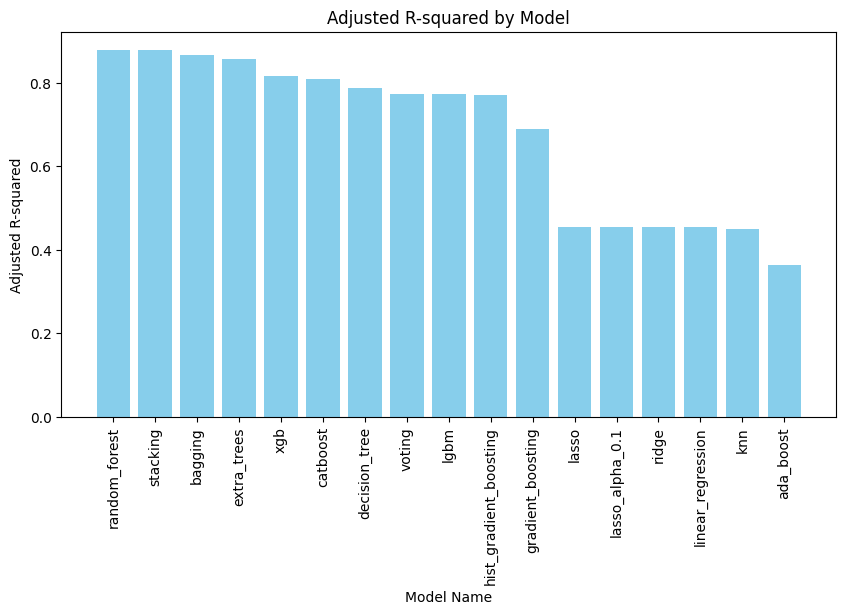

In [47]:
plt.figure(figsize=(10, 5))
plt.bar(Results.index, Results["Adj_R_Square"], color="skyblue")
plt.xlabel('Model Name')
plt.ylabel('Adjusted R-squared')
plt.title('Adjusted R-squared by Model')
plt.xticks(rotation=90)
plt.show()

In [54]:
# Define the parameter grid for RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the RandomForestRegressor and the parameter grid
grid_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("Best parameters found: ", best_params)

# Evaluate the best model on the test set
best_rf_predictions = best_rf.predict(X_test)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, best_rf_predictions))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, best_rf_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, best_rf_predictions)))
print("R-squared:", r2_score(y_test, best_rf_predictions))
print("Adjusted R-squared:", 1 - (1 - r2_score(y_test, best_rf_predictions)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((y_test - best_rf_predictions) / y_test)) * 100)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Mean Absolute Error (MAE): 597.7609776244025
Mean Squared Error (MSE): 1767472.1585455684
Root Mean Squared Error (RMSE): 1329.4631091329945
R-squared: 0.8736958730547204
Adjusted R-squared: 0.8736622677189587
Mean Absolute Percentage Error (MAPE): 8.369708333741888


In [21]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = StandardScaler().fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = StandardScaler().fit_transform(y_test.values.reshape(-1, 1)).ravel()


In [43]:

from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Input, Dropout, Normalization, BatchNormalization
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Input(shape=[X_train.shape[1]]),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(18, activation='relu'),
    Dense(8, activation='relu'), 
    Dense(1, activation='linear'),
])
optimizer = Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss='mean_squared_error',
    metrics=['r2_score'],
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='mean_squared_error',
    patience=10,
    restore_best_weights=True,
    mode='max'
)

# Model training
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=30,
    epochs=100,
    shuffle = True,
    callbacks=[early_stopping],

    
)

Epoch 1/100
5514/5514 ━━━━━━━━━━━━━━━━━━━━ 5s 773us/step - loss: 0.6733 - r2_score: 0.3306 - val_loss: 0.4287 - val_r2_score: 0.5713
Epoch 2/100
5514/5514 ━━━━━━━━━━━━━━━━━━━━ 4s 713us/step - loss: 0.4845 - r2_score: 0.5165 - val_loss: 0.4036 - val_r2_score: 0.5964
Epoch 3/100
5514/5514 ━━━━━━━━━━━━━━━━━━━━ 4s 725us/step - loss: 0.4547 - r2_score: 0.5442 - val_loss: 0.3896 - val_r2_score: 0.6104
Epoch 4/100
5514/5514 ━━━━━━━━━━━━━━━━━━━━ 4s 731us/step - loss: 0.4441 - r2_score: 0.5534 - val_loss: 0.3803 - val_r2_score: 0.6197
Epoch 5/100
5514/5514 ━━━━━━━━━━━━━━━━━━━━ 4s 741us/step - loss: 0.4299 - r2_score: 0.5663 - val_loss: 0.3752 - val_r2_score: 0.6248
Epoch 6/100
5514/5514 ━━━━━━━━━━━━━━━━━━━━ 4s 729us/step - loss: 0.4250 - r2_score: 0.5766 - val_loss: 0.3702 - val_r2_score: 0.6298
Epoch 7/100
5514/5514 ━━━━━━━━━━━━━━━━━━━━ 4s 746us/step - loss: 0.4177 - r2_score: 0.5807 - val_loss: 0.3649 - val_r2_score: 0.6351
Epoch 8/100
5514/5514 ━━━━━━━━━━━━━━━━━━━━ 4s 734us/step - loss: 0.41

In [ ]:
history_df = pd.DataFrame(history.history)



,loss,r2_score,val_loss,val_r2_score
0,0.573004,0.426996,0.411710,0.588290
1,0.459912,0.540088,0.393417,0.606583
2,0.439079,0.560921,0.381568,0.618432
3,0.423734,0.576267,0.376900,0.623100
4,0.414649,0.585351,0.367591,0.632409
...,...,...,...,...
195,0.300556,0.699444,0.262904,0.737096
196,0.299560,0.700440,0.262721,0.737279
197,0.298581,0.701418,0.260515,0.739486
198,0.297601,0.702399,0.262146,0.737854


Best Validation Loss: 0.2599
Best Validation Accuracy: 0.7401


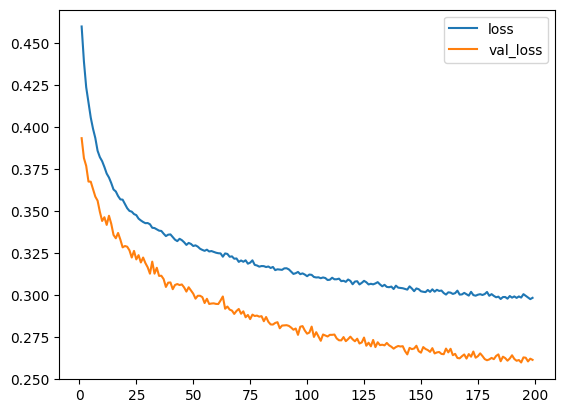

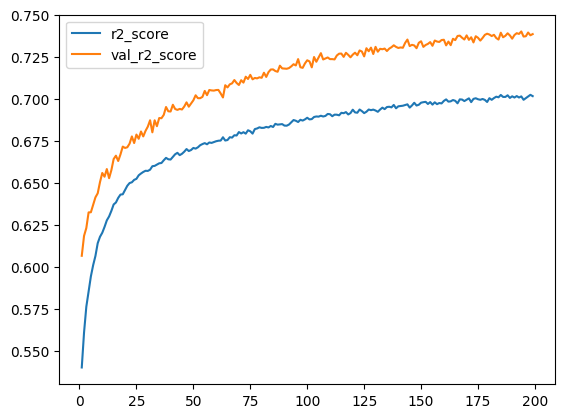

In [29]:
history_df.loc[1:, ['loss', 'val_loss']].plot()
history_df.loc[1:, ['r2_score', 'val_r2_score']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_r2_score'].max()))

In [35]:
from sklearn import metrics

y_pred_prob_test = model.predict(X_test)
r2_score = metrics.r2_score(y_test, y_pred_prob_test)
r2_score

1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step


0.7385563769086947